<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [2]:
from bs4 import BeautifulSoup
import requests

df = pd.read_csv('data/job_listings.csv', index_col=0)

# Define a function to clean html tags
def clean_html(text):
    bytes = eval(text)
    soup = BeautifulSoup(bytes, 'html.parser')
    return soup.get_text()

# Remove '\n'
df['description'] = df['description'].apply(clean_html).replace(r'\n',' ', regex=True)

# Remove unicode
df['description'] = df['description'].apply(lambda x: x.encode('ascii', 'ignore').strip())

# Convert description from bytes to string
df['description'] = df['description'].str.decode("utf-8")
df.head()


,description,title
0,Job Requirements: Conceptual understanding in ...,Data scientist
1,"Job Description As a Data Scientist 1, you wi...",Data Scientist I
2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level
3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist
4,Location: USA multiple locations 2+ years of ...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [3]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# The Tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Make the tokens
tokens = []
for txt in tokenizer.pipe(df['description'], batch_size=500):
    txt_tokens = [token.text for token in txt]
    tokens.append(txt_tokens)
df['tokens'] = tokens
df['tokens'].head()

0    [Job, Requirements:, Conceptual, understanding...
1    [Job, Description,  , As, a, Data, Scientist, ...
2    [As, a, Data, Scientist, you, will, be, workin...
3    [$4,969, -, $6,756, a, monthContractUnder, the...
4    [Location:, USA,  , multiple, locations, 2+, y...
Name: tokens, dtype: object

In [4]:
len(df)

426

In [5]:
df['description'][0]

"Job Requirements: Conceptual understanding in Machine Learning models like Naive Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role) Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R Ability to communicate Model findings to both Technical and Non-Technical stake holders Hands on experience in SQL/Hive or similar programming language Must show past work via GitHub, Kaggle or any other published article Master's degree in Statistics/Mathematics/Computer Science or any other quant specific field. Apply Now"

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vect = CountVectorizer(stop_words='english')

# Build vocab
dtm = vect.fit_transform(df['description'])

# Get word counts for each listing
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

print(dtm.shape)
dtm.head()



(426, 8529)


,00,000,02115,03,0305,0356,04,062,06366,08,...,zf,zfs,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich,zurichs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
import seaborn as sns
sns.set()

def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.
    
    # Arguments
        samples_texts: list, sample texts.
    """
    num_words = [len(s.split()) for s in sample_texts]
    
    plt.figure(figsize=(8,6))
    sns.distplot(num_words)
    plt.title('Number of Words per Document', fontsize=14)
    plt.xlabel('Number of Words', fontsize=12)
    plt.ylabel('Proportion of documents', fontsize=12)
    plt.show()

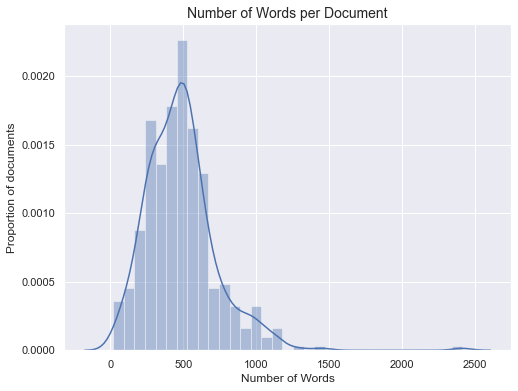

In [8]:
plot_sample_length_distribution(df['description'])

## 4) Visualize the most common word counts

In [9]:
def count(data, n=None):
    """
    List the top n words in a vocabulary
    """
    vect = CountVectorizer(stop_words='english')
    vect.fit(data)
    dtm = vect.transform(data)
    sum_words = dtm.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]



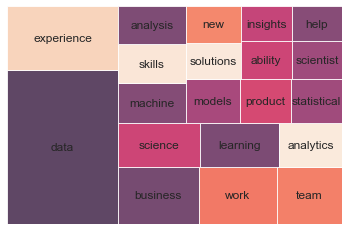

In [10]:
import squarify
import matplotlib.pyplot as plt

top20_words = pd.DataFrame(count(df['description'], n=20), columns=['word', 'count'])

squarify.plot(sizes=top20_words['count'], label=top20_words['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [20]:
##### Your Code Here #####


def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]

In [43]:

from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english',
                        ngram_range = (1,2),
                        min_df = 5,
                        max_df= 0.5)
                        #max_features = 2000)

# Create a vocabulary and get word counts per listing
dtm = tfidf.fit_transform(df['description'])

# Get feature names to use a dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
print(dtm.shape)
dtm.head()

(426, 6043)


,000,000 employees,10,10 years,100,100 000,100 companies,100 countries,11,12,...,york,york city,youll,youll develop,youll doing,youll need,youll work,youre,youre looking,youve
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [45]:
##### Your Code Here #####
from sklearn.neighbors import NearestNeighbors

# Fit on dtm
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [46]:
# Query Using kneighbors 
nn.kneighbors([dtm.iloc[0]])

(array([[0.        , 1.30416914, 1.3199104 , 1.33334684, 1.3347272 ]]),
 array([[  0, 338, 115, 168, 366]]))

In [49]:
df['description'][0][:150]

'Job Requirements: Conceptual understanding in Machine Learning models like Naive Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Ra'

In [50]:
df['description'][420][:150]

'At Uber, we ignite opportunity by setting the world in motion. We take on big problems to help drivers, riders, delivery partners, and eaters get movi'

In [58]:
ideal = ["""
Data analysis, Linear and multivariate regressions, Predictive analytics, K-cluster analysis, Machine learning products, Natural language processing. 
Python (NumPy, Pandas, Scikit-learn), SQL.  
"""]

In [59]:
# Query the ideal job
new = tfidf.transform(ideal)
new

<1x6043 sparse matrix of type '<class 'numpy.float64'>'
	with 22 stored elements in Compressed Sparse Row format>

In [60]:
nn.kneighbors(new.todense())

(array([[1.30886909, 1.32616835, 1.32616835, 1.33348987, 1.33385636]]),
 array([[300, 269, 348, 366, 162]]))

In [62]:
# Inspect most relevant job
df['description'][300]

'We are looking for an experienced Data Scientist to launch our new analytical framework for predicting consumer behavior in the mortgage buying process. In this role, you will work closely with Product Management to analyze potential data sources, design key modeling capabilities, and develop new systems for continuous improvement. Nomis is the market leader in bringing pricing optimization to retail banking and you will be responsible for achieving the same level of success as we enter the US Mortgage industry.  Responsibilities  Build analytical models and solutions to help users understand the price elasticity of customer segments and make better data-driven decisions. Design systems for dynamically recalibrating models to account for new market insights Partner closely with product leadership to analyze key data sources for understanding and predicting customer behavior. Develop pricing models to simulate profitability from pricing strategies and forecast changes to a banks custom

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 